In [1]:
#!pip install pandas_datareader

In [2]:
#!pip install finance-datareader

In [1]:
import warnings
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation, Conv1D

warnings.filterwarnings('ignore')

AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'register_clear_session_function'

In [ ]:
import pandas_datareader as pdr

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
# https://github.com/FinanceData/FinanceDataReader
# 금, 은과 같은 현물, 달러와 같은 화폐 데이터

# Read Data

In [3]:
# finance datareader로부터 데이터 불러오기

# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
#ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')
data = fdr.DataReader('069500',start='2007-01-03')
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2007-01-03,14451,14455,14195,14232,1106268,-0.014268
2007-01-04,14181,14219,13952,14029,927311,-0.014264
2007-01-05,14058,14065,13818,13929,2322080,-0.007128
2007-01-08,13907,13907,13727,13783,1869083,-0.010482
2007-01-09,13795,13859,13766,13828,828783,0.003265
...,...,...,...,...,...,...
2022-05-19,34125,34450,34060,34370,6054919,-0.014339
2022-05-20,34515,35025,34485,34985,4661990,0.017894
2022-05-23,35135,35225,34915,35100,5876025,0.003287


In [4]:
data = data.reset_index()

data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change']
data['Date'] = pd.to_datetime(data['Date'])

data.index = data['Date']
data.set_index('Date', inplace=True)

data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2007-01-03,14451,14455,14195,14232,1106268,-0.014268
2007-01-04,14181,14219,13952,14029,927311,-0.014264
2007-01-05,14058,14065,13818,13929,2322080,-0.007128
2007-01-08,13907,13907,13727,13783,1869083,-0.010482
2007-01-09,13795,13859,13766,13828,828783,0.003265
...,...,...,...,...,...,...
2022-05-19,34125,34450,34060,34370,6054919,-0.014339
2022-05-20,34515,35025,34485,34985,4661990,0.017894
2022-05-23,35135,35225,34915,35100,5876025,0.003287


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3805 entries, 2007-01-03 to 2022-05-25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3805 non-null   int64  
 1   High    3805 non-null   int64  
 2   Low     3805 non-null   int64  
 3   Close   3805 non-null   int64  
 4   Volume  3805 non-null   int64  
 5   Change  3805 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 208.1 KB


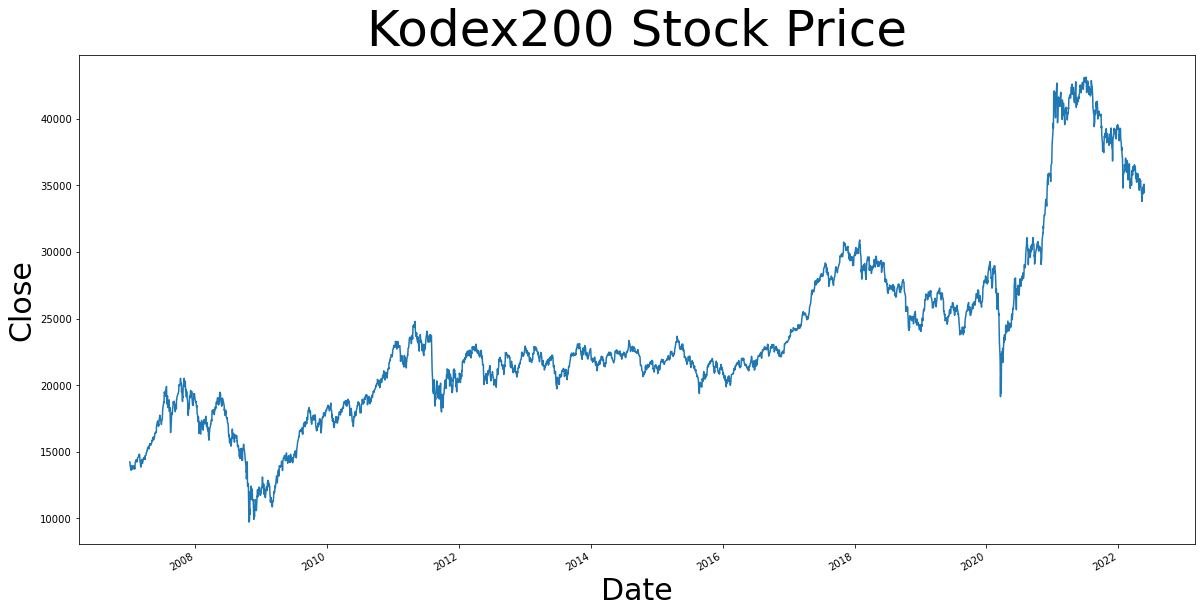

In [5]:
fig = plt.subplots(figsize=(20, 10))
data['Close'].plot()
plt.title("Kodex200 Stock Price",fontsize=50)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Close', fontsize=30)
plt.show()

In [6]:
target = []
for i in range(data.shape[0]):
    if data['Change'][i] >0:
        target.append(1)
    else:
        target.append(0)
data['Target'] = target

In [7]:

date_sentiment= pd.read_csv('date_sentiment.csv')



In [8]:
date_sentiment = date_sentiment.drop(['Unnamed: 0', 'Unnamed: 0.1', 'percent'], axis=1)

In [9]:
date_sentiment = date_sentiment.reset_index()

In [10]:
for i in range(len(date_sentiment)):
    date_sentiment['Date'][i] = date_sentiment['Date'][i][:-4]
    

<ipython-input-10-6036fe6b1b9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_sentiment['Date'][i] = date_sentiment['Date'][i][:-4]


In [11]:
for i in range(len(date_sentiment)):
    date_sentiment['Date'][i] = date_sentiment['Date'][i].replace('년','-').replace('월','-')

<ipython-input-11-cbe0d13ae7c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_sentiment['Date'][i] = date_sentiment['Date'][i].replace('년','-').replace('월','-')


In [12]:
date_sentiment['Date'] = pd.to_datetime(date_sentiment['Date'])

In [13]:
date_sentiment = date_sentiment.set_index('Date')

In [14]:
date_sentiment

,index,label_index
Date,,
2007-01-02,0,0.000000
2007-01-03,1,0.000000
2007-01-05,2,1.000000
2007-01-08,3,1.000000
2007-01-10,4,0.000000
...,...,...
2022-05-16,3951,-0.454545
2022-05-17,3952,-0.400000
2022-05-18,3953,0.071429


# 거시경제지표
### 나스닥, 금값, 은값, 환율, 유가, 외환 시장

In [15]:
nasdaq_df = fdr.DataReader('NASDAQCOM', data_source='fred', start = '2007-01-02')
nasdaq_df

,NASDAQCOM
DATE,
2007-01-03,2423.16
2007-01-04,2453.43
2007-01-05,2434.25
2007-01-08,2438.20
2007-01-09,2443.83
...,...
2022-05-18,11418.15
2022-05-19,11388.50
2022-05-20,11354.62


### 나스닥

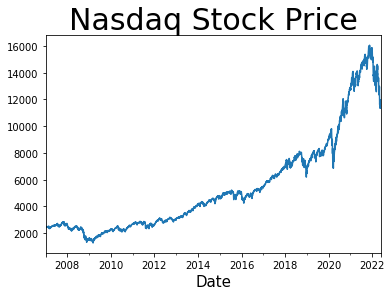

In [21]:
fig = plt.subplots(figsize=(6, 4))
nasdaq_df['NASDAQCOM'].plot()
plt.title("Nasdaq Stock Price",fontsize=30)
plt.xlabel('Date', fontsize=15)

plt.show()

### 다우종합지수

In [16]:
dji_df = fdr.DataReader('DJI', '2007-01-01')
dji_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2007-01-03,12474.52,12459.54,12580.35,12404.82,327200000.0,0.0009
2007-01-04,12480.69,12473.16,12510.41,12403.86,259060000.0,0.0005
2007-01-05,12398.01,12480.05,12480.13,12365.41,235220000.0,-0.0066
2007-01-08,12423.49,12392.01,12445.92,12337.37,223500000.0,0.0021
2007-01-09,12416.60,12424.77,12466.43,12369.17,225160000.0,-0.0006
...,...,...,...,...,...,...
2022-05-18,31493.56,32468.67,32468.67,31394.68,443960000.0,-0.0356
2022-05-19,31253.26,31262.62,31567.57,31018.06,503760000.0,-0.0076
2022-05-20,31260.58,31426.94,31514.07,30635.76,479030000.0,0.0002


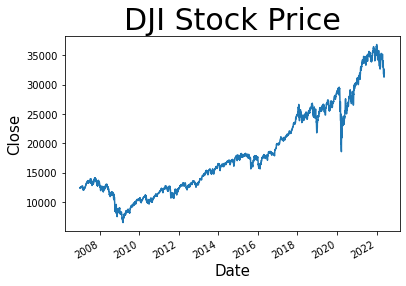

In [23]:
fig = plt.subplots(figsize=(6, 4))
dji_df['Close'].plot()
plt.title("DJI Stock Price",fontsize=30)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close', fontsize=15)
plt.show()

### 금 선물

In [24]:
gold_df = fdr.DataReader('ZG', start='2007-01-01')
gold_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2007-01-03,627.1,640.4,640.4,628.5,40.0,-0.0128
2007-01-05,604.9,623.7,623.7,617.3,530.0,-0.0305
2007-01-08,607.5,607.5,607.5,607.5,1000.0,0.0043
2007-01-30,644.2,643.0,647.5,640.8,25820.0,0.0017
2007-01-31,652.0,646.5,655.5,641.8,3050.0,0.0121
...,...,...,...,...,...,...
2022-05-18,1815.9,1813.2,1822.9,1805.0,150350.0,-0.0016
2022-05-19,1841.2,1815.1,1848.2,1808.4,175240.0,0.0139
2022-05-20,1842.1,1839.6,1847.8,1830.6,143050.0,0.0005


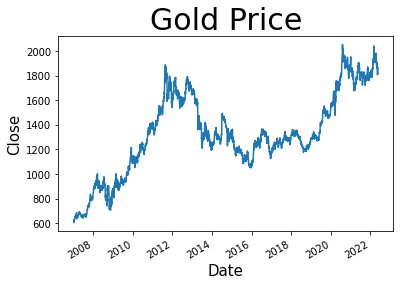

In [25]:
fig = plt.subplots(figsize=(6, 4))
gold_df['Close'].plot()
plt.title("Gold Price",fontsize=30)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close', fontsize=15)
plt.show()

### 은 선물

In [26]:
# silver_df = fdr.DataReader('ZI', start='2007-01-01')
# silver_df

In [27]:
# fig = plt.subplots(figsize=(6, 4))
# silver_df['Close'].plot()
# plt.title("Silver Price",fontsize=30)
# plt.xlabel('Date', fontsize=15)
# plt.ylabel('Close', fontsize=15)
# plt.show()

### 환율

In [17]:
usdkrw_df = fdr.DataReader('USD/KRW', '2007-01-01') # 달러 원화
usdeur_df = fdr.DataReader('USD/EUR', '2007-01-01') # 달러 유로화
usdcny_df = fdr.DataReader('USD/CNY', '2007-01-01') # 달러 위엔화

In [19]:
usdeur_df

,Close,Open,High,Low,Change
Date,,,,,
2007-01-01,0.7576,0.7576,0.7590,0.7572,0.0001
2007-01-02,0.7530,0.7575,0.7578,0.7519,-0.0061
2007-01-03,0.7597,0.7532,0.7607,0.7522,0.0089
2007-01-04,0.7644,0.7594,0.7648,0.7584,0.0062
2007-01-05,0.7689,0.7641,0.7703,0.7628,0.0059
...,...,...,...,...,...
2022-05-19,0.9442,0.9551,0.9560,0.9427,-0.0114
2022-05-20,0.9466,0.9445,0.9495,0.9434,0.0025
2022-05-23,0.9352,0.9459,0.9471,0.9347,-0.0120


<AxesSubplot:xlabel='Date'>

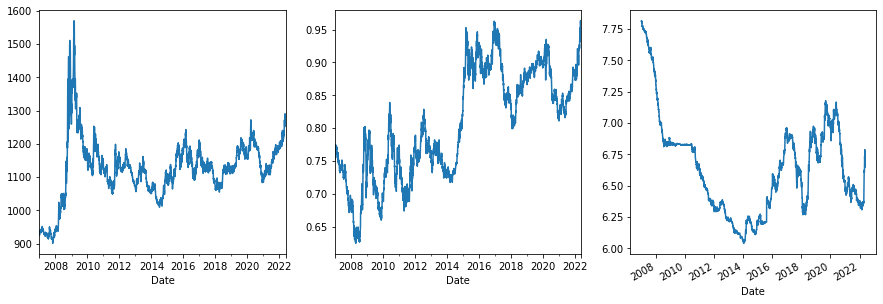

In [29]:
f, ax = plt.subplots(ncols=3)
f.set_size_inches((15,5))


usdkrw_df['Close'].plot(ax=ax[0])
usdeur_df['Close'].plot(ax=ax[1])
usdcny_df['Close'].plot(ax=ax[2])


In [30]:
wt_df = pdr.DataReader('POILWTIUSDM', 'fred', start='2000-01-01')
wt_df

,POILWTIUSDM
DATE,
2000-01-01,27.240000
2000-02-01,29.210000
2000-03-01,29.920000
2000-04-01,25.780000
2000-05-01,28.780000
...,...
2021-07-01,72.581818
2021-08-01,67.727273
2021-09-01,71.460455


<AxesSubplot:xlabel='DATE'>

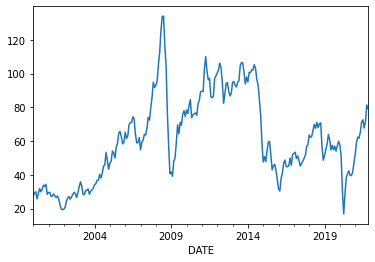

In [31]:
fig = plt.subplots(figsize=(6, 4))
wt_df['POILWTIUSDM'].plot()


# 경제지표 df 만들기

In [32]:
#nasdaq_df, dji_df, gold_df, usdkrw_df, usdeur_df ,usdcny_df

In [33]:
nasdaq_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4014 entries, 2007-01-03 to 2022-05-23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NASDAQCOM  4014 non-null   float64
dtypes: float64(1)
memory usage: 62.7 KB


In [34]:
date_sentiment = date_sentiment['label_index']

In [35]:
nasdaq = nasdaq_df['NASDAQCOM']
dji = dji_df['Close']
gold = gold_df['Close']
usdkrw = usdkrw_df['Close']
usdeur = usdeur_df['Close']
usdcny = usdcny_df['Close']

In [36]:
merge_df = pd.concat([nasdaq, dji, gold, usdkrw, usdeur, usdcny,date_sentiment],axis=1, join='inner')   #열방향(axis=1), 교집합(inner)

In [37]:
columns=['NASDAQ','DJI', 'GOLD', 'KRW', 'EUR', 'CNY', 'sentiment']

In [38]:
merge_df.columns= columns

In [39]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3664 entries, 2007-01-03 to 2022-05-20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NASDAQ     3664 non-null   float64
 1   DJI        3664 non-null   float64
 2   GOLD       3664 non-null   float64
 3   KRW        3664 non-null   float64
 4   EUR        3664 non-null   float64
 5   CNY        3664 non-null   float64
 6   sentiment  3664 non-null   float64
dtypes: float64(7)
memory usage: 229.0 KB


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3805 entries, 2007-01-03 to 2022-05-25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3805 non-null   int64  
 1   High    3805 non-null   int64  
 2   Low     3805 non-null   int64  
 3   Close   3805 non-null   int64  
 4   Volume  3805 non-null   int64  
 5   Change  3805 non-null   float64
 6   Target  3805 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 237.8 KB


# kodex200, merge_df 중복되는 일자만 남기기

In [41]:
data_merge_df = pd.concat([data, merge_df],axis=1, join='inner')
data_merge_df

,Open,High,Low,Close,Volume,Change,Target,NASDAQ,DJI,GOLD,KRW,EUR,CNY,sentiment
2007-01-03,14451,14455,14195,14232,1106268,-0.014268,0,2423.16,12474.52,627.1,926.15,0.7597,7.8160,0.000000
2007-01-05,14058,14065,13818,13929,2322080,-0.007128,0,2434.25,12398.01,604.9,934.45,0.7689,7.8090,1.000000
2007-01-08,13907,13907,13727,13783,1869083,-0.010482,0,2438.20,12423.49,607.5,938.10,0.7680,7.8127,1.000000
2007-02-02,13916,14214,13916,14208,1357483,0.021350,1,2475.88,12653.49,646.2,937.25,0.7712,7.7560,-1.000000
2007-02-05,14195,14284,14113,14300,1572882,0.006475,1,2470.60,12661.74,650.9,935.80,0.7733,7.7585,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,34850,34925,34395,34470,7376786,-0.003901,0,11662.79,32224.01,1814.0,1280.38,0.9583,6.7822,-0.454545
2022-05-17,34525,34850,34520,34805,3999458,0.009719,1,11984.52,32655.05,1818.9,1266.50,0.9478,6.7337,-0.400000
2022-05-18,34990,35145,34770,34870,6376438,0.001868,1,11418.15,31493.56,1815.9,1275.33,0.9551,6.7540,0.071429
2022-05-19,34125,34450,34060,34370,6054919,-0.014339,0,11388.50,31253.26,1841.2,1262.61,0.9442,6.7085,-0.800000


In [42]:
kodex_df = data_merge_df.iloc[:,:7]

In [43]:
economy_df = data_merge_df.iloc[:,7:]
economy_df.head()

,NASDAQ,DJI,GOLD,KRW,EUR,CNY,sentiment
2007-01-03,2423.16,12474.52,627.1,926.15,0.7597,7.8160,0.0
2007-01-05,2434.25,12398.01,604.9,934.45,0.7689,7.8090,1.0
2007-01-08,2438.20,12423.49,607.5,938.10,0.7680,7.8127,1.0
2007-02-02,2475.88,12653.49,646.2,937.25,0.7712,7.7560,-1.0
2007-02-05,2470.60,12661.74,650.9,935.80,0.7733,7.7585,0.0


# Normalization

In [44]:
scaler = MinMaxScaler()

columns=['NASDAQ','DJI', 'GOLD', 'KRW', 'EUR', 'CNY', 'sentiment']
# 스케일 후 columns
scaled_data = scaler.fit_transform(economy_df[columns])
scaled_data

scaled_economy_df = pd.DataFrame(scaled_data, columns=columns)
scaled_economy_df

,NASDAQ,DJI,GOLD,KRW,EUR,CNY,sentiment
0,0.078067,0.195933,0.015314,0.037844,0.397633,1.000000,0.500000
1,0.078817,0.193404,0.000000,0.050235,0.424852,0.996056,1.000000
2,0.079084,0.194246,0.001793,0.055684,0.422189,0.998141,1.000000
3,0.081632,0.201848,0.028489,0.054415,0.431657,0.966193,0.000000
4,0.081275,0.202121,0.031731,0.052251,0.437870,0.967602,0.500000
...,...,...,...,...,...,...,...
3498,0.702839,0.848752,0.834035,0.566664,0.985207,0.417512,0.272727
3499,0.724594,0.863000,0.837415,0.545943,0.954142,0.390185,0.300000
3500,0.686297,0.824607,0.835345,0.559125,0.975740,0.401623,0.535714
3501,0.684292,0.816664,0.852797,0.540136,0.943491,0.375986,0.100000


In [45]:
scaler = MinMaxScaler()

columns = ['Open', 'High', 'Low', 'Close', 'Volume','Change', 'Target']
# 스케일 후 columns
scaled_data = scaler.fit_transform(kodex_df[columns])
scaled_data


array([[0.1474378 , 0.12676938, 0.14295473, ..., 0.01383945, 0.34209774,
        0.        ],
       [0.13576985, 0.11514736, 0.13175716, ..., 0.03345628, 0.37079408,
        0.        ],
       [0.13128674, 0.11043895, 0.12905429, ..., 0.02614729, 0.35731514,
        0.        ],
       ...,
       [0.75722938, 0.74333224, 0.75406915, ..., 0.09887234, 0.40694936,
        1.        ],
       [0.73154801, 0.72262121, 0.73298087, ..., 0.09368471, 0.3418121 ,
        0.        ],
       [0.74312689, 0.73975624, 0.74560413, ..., 0.07121015, 0.47136091,
        1.        ]])

In [46]:
scaled_kodex_df = pd.DataFrame(scaled_data, columns=columns)
scaled_kodex_df

,Open,High,Low,Close,Volume,Change,Target
0,0.147438,0.126769,0.142955,0.132393,0.013839,0.342098,0.0
1,0.135770,0.115147,0.131757,0.123301,0.033456,0.370794,0.0
2,0.131287,0.110439,0.129054,0.118920,0.026147,0.357315,0.0
3,0.131554,0.119588,0.134668,0.131673,0.017893,0.485253,1.0
4,0.139837,0.121674,0.140519,0.134434,0.021368,0.425469,1.0
...,...,...,...,...,...,...,...
3498,0.753073,0.736776,0.742931,0.739685,0.115013,0.383764,0.0
3499,0.743424,0.734541,0.746644,0.749737,0.060520,0.438504,1.0
3500,0.757229,0.743332,0.754069,0.751688,0.098872,0.406949,1.0
3501,0.731548,0.722621,0.732981,0.736684,0.093685,0.341812,0.0


# 다변수 LSTM  (경제지표) 분류

In [47]:

label= scaled_kodex_df['Target']
label

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
3498    0.0
3499    1.0
3500    1.0
3501    0.0
3502    1.0
Name: Target, Length: 3503, dtype: float64

In [48]:
# create windows
# 최근 50일간의 데이터를 바탕으로 다음날 예측
window_size = 50
sequence_length = window_size + 1

result = []
label_list = []
for index in range(len(scaled_economy_df) - sequence_length):
    result.append(scaled_economy_df[index:index+window_size])
    label_list.append(label[index+window_size])
len(result)
#3452개의 window 생성

3452

In [49]:
x = np.array(result)
y = np.array(label_list)
print(x.shape,y.shape)


(3452, 50, 7) (3452,)


In [50]:
split = -100

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3352, 50, 7) (3352,)
(100, 50, 7) (100,)


In [51]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50,7))) # 50 -> window size

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1,activation='sigmoid')) # 다음날 하루 예측

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            11600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 41,105
Trainable params: 41,105
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=10)

Epoch 1/10
336/336 [==============================] - 25s 23ms/step - loss: 0.6922 - accuracy: 0.5302 - val_loss: 0.6911 - val_accuracy: 0.5500
Epoch 2/10
336/336 [==============================] - 7s 20ms/step - loss: 0.6907 - accuracy: 0.5300 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/10
336/336 [==============================] - 7s 20ms/step - loss: 0.6922 - accuracy: 0.5080 - val_loss: 0.6974 - val_accuracy: 0.4600
Epoch 4/10
336/336 [==============================] - 7s 20ms/step - loss: 0.6914 - accuracy: 0.5233 - val_loss: 0.6993 - val_accuracy: 0.4600
Epoch 5/10
336/336 [==============================] - 7s 20ms/step - loss: 0.6911 - accuracy: 0.5253 - val_loss: 0.6933 - val_accuracy: 0.5100
Epoch 6/10
336/336 [==============================] - 7s 21ms/step - loss: 0.6923 - accuracy: 0.5267 - val_loss: 0.6955 - val_accuracy: 0.4600
Epoch 7/10
336/336 [==============================] - 7s 20ms/step - loss: 0.6907 - accuracy: 0.5230 - val_loss: 0.6996 - val_accuracy: 0.460

In [53]:
x_test[-1].shape[0]

50

In [54]:
x_test.shape

(100, 50, 7)

# 마지막날 예측 
ex> 날짜 -> 그 날부터 22-5-20까지 추가 , db 업뎃
    -> 예측 

In [55]:
temp = np.reshape(x_test[-1], (1, x_test[-1].shape[0],x_test[-1].shape[1]))
temp.shape

(1, 50, 7)

In [56]:
model.predict(temp)

array([[0.547019]], dtype=float32)

------------------------------------------------------------------------------------------------

# 다변수 LSTM  (경제지표) 회귀

In [57]:
label = scaled_kodex_df['Close']
label

0       0.132393
1       0.123301
2       0.118920
3       0.131673
4       0.134434
          ...   
3498    0.739685
3499    0.749737
3500    0.751688
3501    0.736684
3502    0.755139
Name: Close, Length: 3503, dtype: float64

In [58]:
# create windows
# 최근 50일간의 데이터를 바탕으로 다음날 예측
window_size = 50
sequence_length = window_size + 1

result = []
label_list = []
for index in range(len(scaled_economy_df) - sequence_length):
    result.append(scaled_economy_df[index:index+window_size])
    label_list.append(label[index+window_size])
len(result)
#3481개의 window 생성

3452

In [59]:
x = np.array(result)
x.shape

(3452, 50, 7)

In [60]:
y = np.array(label_list)
y.shape

(3452,)

In [61]:
split = -100

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3352, 50, 7) (3352,)
(100, 50, 7) (100,)


In [62]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50,7))) # 50 -> window size

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear')) # 다음날 하루 예측

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            11600     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 41,105
Trainable params: 41,105
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=10)

Epoch 1/10
336/336 [==============================] - 11s 23ms/step - loss: 0.0087 - val_loss: 8.7841e-04
Epoch 2/10
336/336 [==============================] - 7s 20ms/step - loss: 0.0028 - val_loss: 0.0088
Epoch 3/10
336/336 [==============================] - 7s 20ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 4/10
336/336 [==============================] - 7s 20ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 5/10
336/336 [==============================] - 7s 20ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 6/10
336/336 [==============================] - 7s 20ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 7/10
336/336 [==============================] - 6s 19ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 8/10
336/336 [==============================] - 7s 20ms/step - loss: 9.0220e-04 - val_loss: 0.0039
Epoch 9/10
336/336 [==============================] - 7s 20ms/step - loss: 8.6064e-04 - val_loss: 0.0114
Epoch 10/10
336/336 [==============================] - 7s 20ms/step - loss: 7.

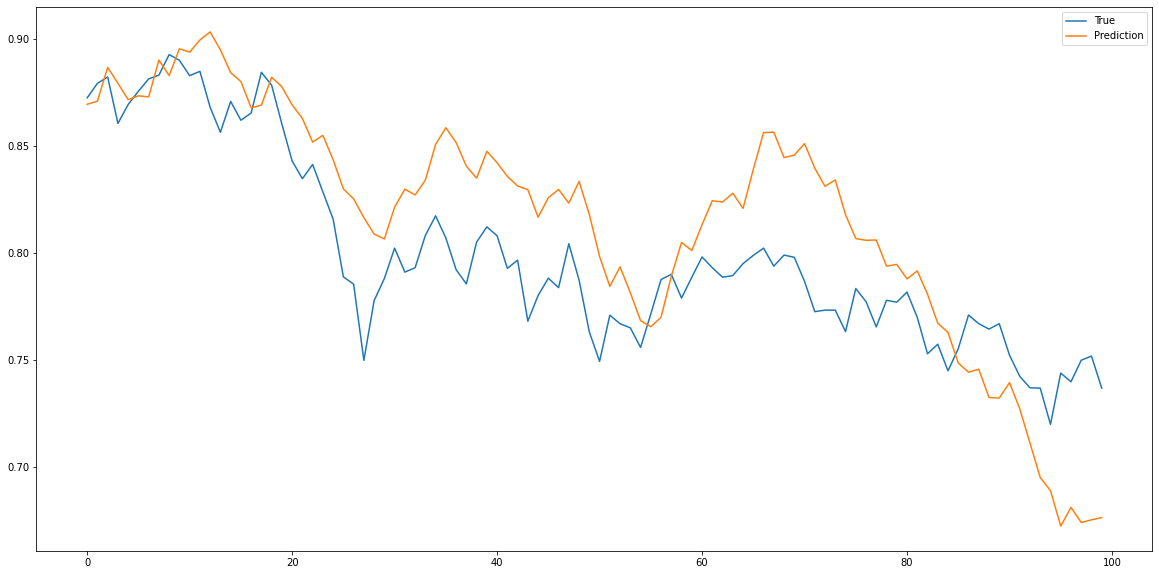

In [64]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

# LSTM 초안 (가격만으로)

In [65]:
# compute mid price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [76]:
# create windows
# 최근 50일간의 데이터를 바탕으로 다음날 예측
window_size = 50
sequence_length = window_size + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])
len(result)
#4800개의 window 생성

3754

In [77]:
normalized_data = []
window_mean = []
window_std = []

for window in result:
    normalized_window = [((p - np.mean(window)) / np.std(window)) for p in window]
    normalized_data.append(normalized_window)
    window_mean.append(np.mean(window))
    window_std.append(np.std(window))
result = np.array(normalized_data)

In [78]:
train = result[:3654, :]
#np.random.shuffle(train)
x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

In [79]:
train.shape

(3654, 51)

In [80]:
x_train.shape

(3654, 50, 1)

In [81]:
x_test = result[3654:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[3654:, -1]


In [82]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # 50 -> window size

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear')) # 다음날 하루 예측

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=10)

Epoch 1/10
366/366 [==============================] - 10s 21ms/step - loss: 0.5738 - val_loss: 0.2811
Epoch 2/10
366/366 [==============================] - 7s 20ms/step - loss: 0.1613 - val_loss: 0.2529
Epoch 3/10
366/366 [==============================] - 7s 20ms/step - loss: 0.1526 - val_loss: 0.2363
Epoch 4/10
366/366 [==============================] - 7s 20ms/step - loss: 0.1481 - val_loss: 0.2465
Epoch 5/10
366/366 [==============================] - 7s 20ms/step - loss: 0.1406 - val_loss: 0.2702
Epoch 6/10
366/366 [==============================] - 7s 20ms/step - loss: 0.1446 - val_loss: 0.2414
Epoch 7/10
366/366 [==============================] - 7s 20ms/step - loss: 0.1410 - val_loss: 0.2442
Epoch 8/10
366/366 [==============================] - 7s 20ms/step - loss: 0.1458 - val_loss: 0.2433
Epoch 9/10
366/366 [==============================] - 8s 21ms/step - loss: 0.1410 - val_loss: 0.2425
Epoch 10/10
366/366 [==============================] - 8s 21ms/step - loss: 0.1467 - val_l

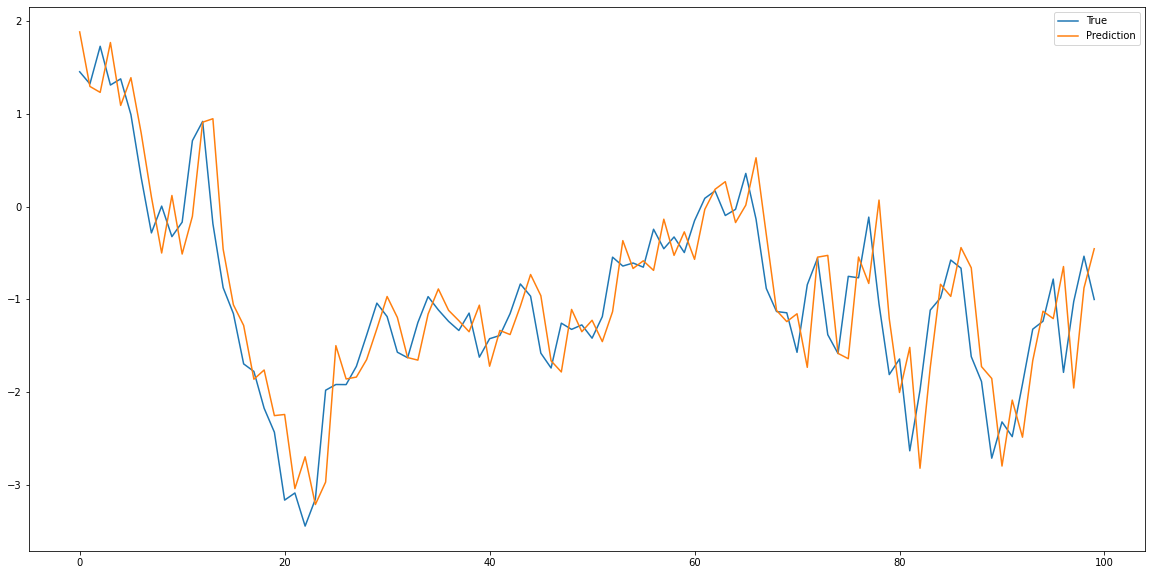

In [84]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

# news 감정 3가지로 나누기 테스트

In [ ]:
news_sentiment= pd.read_csv('news_sentiment.csv')
news_sentiment

In [ ]:
news_sentiment.loc[news_sentiment['label'] == '긍정', 'label_index'] = 1
news_sentiment.loc[news_sentiment['label'] == '부정', 'label_index'] = 0

In [ ]:
groups = news_sentiment.groupby('Date')

In [ ]:
date_sentiment = groups.mean()
date_sentiment